# Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Import the data

In [2]:
# Load the Excel file
data = pd.read_excel('SALES PREDICTION.xlsx')

In [3]:
print(data.head())  # View the first few rows of the dataset

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [4]:
print(data.info())# Check data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [5]:
print(data.describe())  # Summary statistics

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [6]:
print(data.isnull().sum())  # Check for missing values in each column

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [7]:
print(data.shape)

(200, 4)


# Exploratory Data Analysis(EDA)

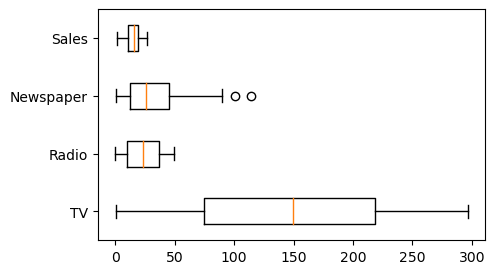

In [8]:
plt.figure(figsize=[5,3])
plt.boxplot(data,vert=False,data=data,labels=data.columns)
plt.show()

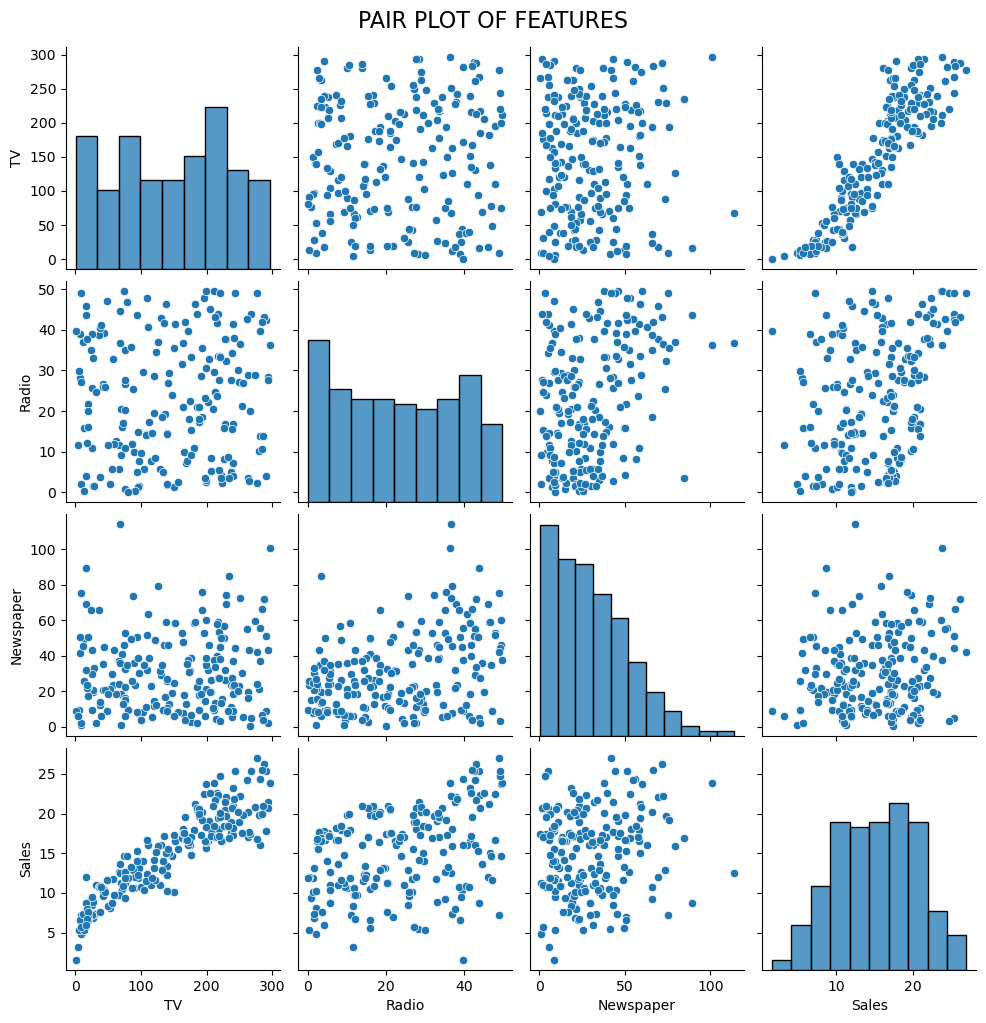

In [9]:
# Pair plot for feature relationships
sns.pairplot(data[['TV', 'Radio', 'Newspaper', 'Sales']])
plt.suptitle("PAIR PLOT OF FEATURES", y=1.02, size=16)
plt.show()


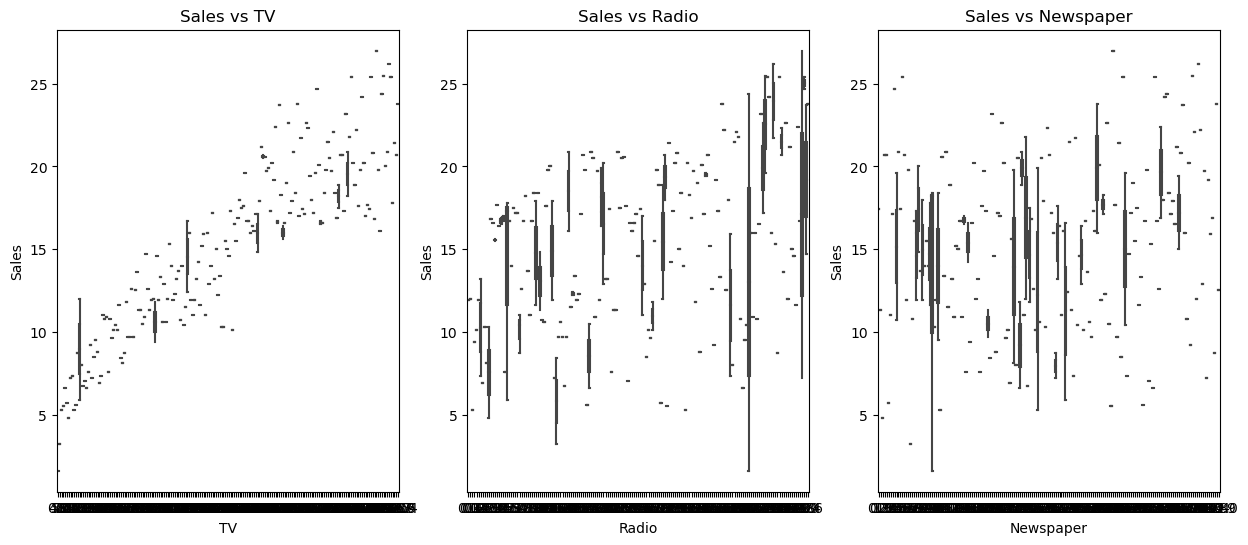

In [10]:
# Boxplot for Sales vs. each advertising medium
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

for i, col in enumerate(['TV', 'Radio', 'Newspaper']):
    sns.boxplot(x=col, y='Sales', data=data, ax=axes[i])
    axes[i].set_title(f"Sales vs {col}")

plt.show()

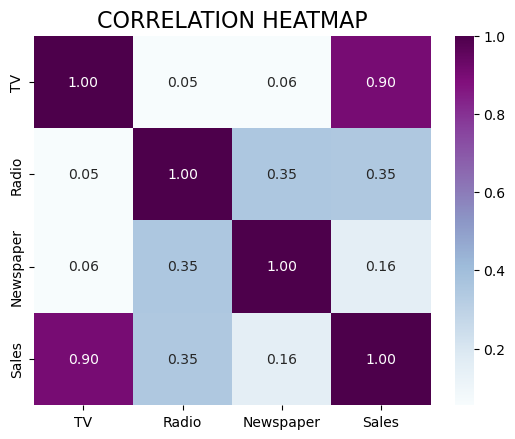

In [11]:
# Correlation heatmap
correlation_matrix = data[['TV', 'Radio', 'Newspaper', 'Sales']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f")
plt.title("CORRELATION HEATMAP", size=16)
plt.show()


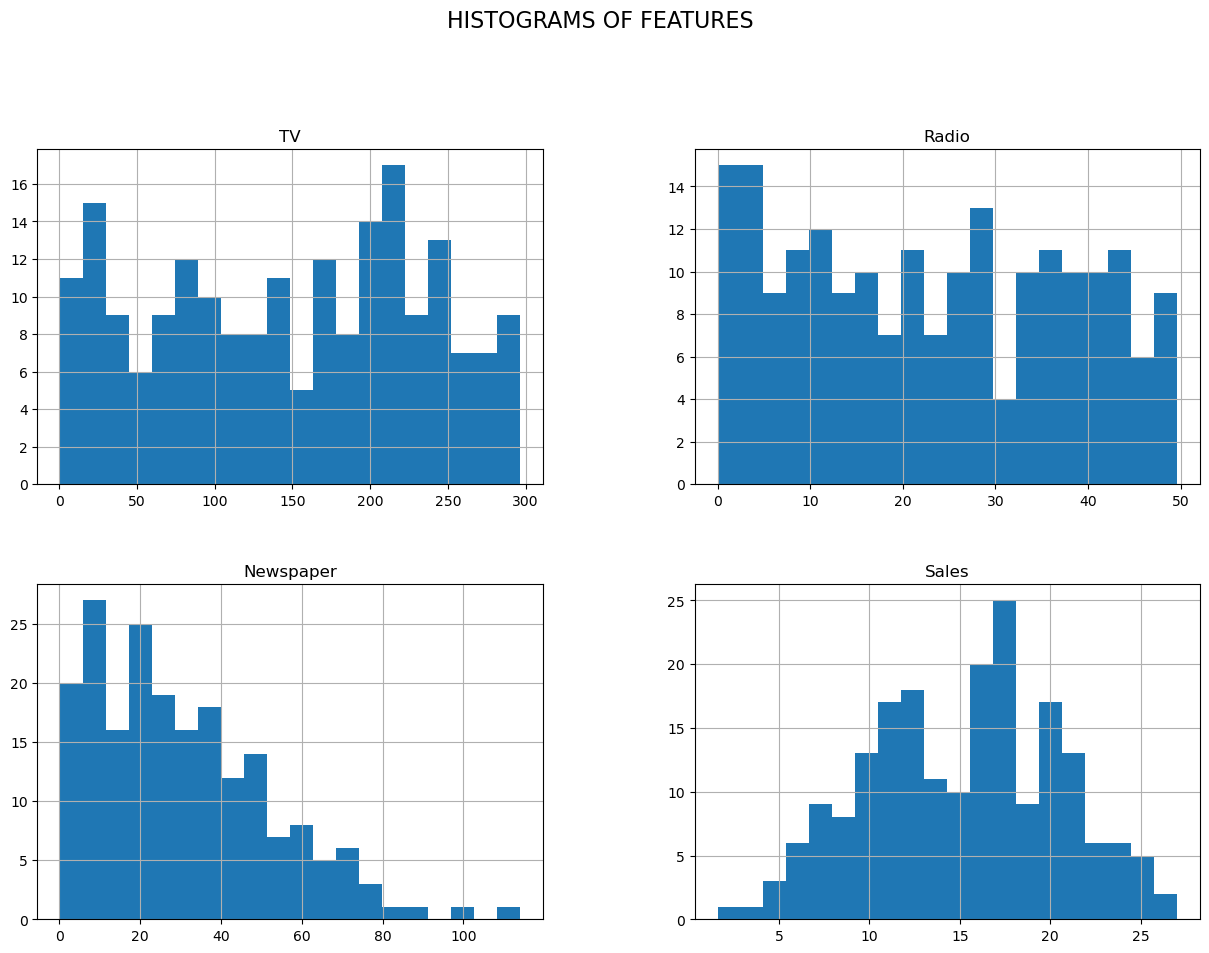

In [12]:
# Histogram for each feature
data[['TV', 'Radio', 'Newspaper', 'Sales']].hist(bins=20, figsize=(15, 10))
plt.suptitle("HISTOGRAMS OF FEATURES", y=1.02, size=16)
plt.show()


# Hypothesis test analysis

In [13]:
# Chi-square test
contingency_table = pd.crosstab(data['Newspaper'], data['Sales'] > data['Sales'].median())
chi2_stat, p_value_chi2, _, _ = chi2_contingency(contingency_table)

# Interpret the Results
print("Chi-square Test Results for TV and Sales:")
print("Chi-square statistic:", chi2_stat)
print("p-value (Chi-square):", p_value_chi2)

if p_value_chi2 < 0.05:
    print("There is a significant association between Newspaper and sales.")
else:
    print("There is no significant association between Newspaper and sales.")

Chi-square Test Results for TV and Sales:
Chi-square statistic: 161.984793917567
p-value (Chi-square): 0.6772802030822641
There is no significant association between Newspaper and sales.


In [14]:
# One-way ANOVA
f_statistic, p_value_anova = f_oneway(data['Sales'][data['TV'] == 'TV'],
                                       data['Sales'][data['Radio'] == 'Radio'],
                                       data['Sales'][data['Newspaper'] == 'Newspaper'])

#Interpret the Results
print("One-way ANOVA Results for Sales:")

if p_value_anova < 0.05:
    print("The mean sales across categories are significantly different.")
else:
    print("There is no significant difference in mean sales across categories.")

One-way ANOVA Results for Sales:
There is no significant difference in mean sales across categories.


C:\Users\HP\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


# Feature engineering

In [15]:
# Prepare features and target variable
X = data[['TV', 'Newspaper', 'Radio']]  # Features (advertising expenditures)
y = data['Sales']  # Target variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))


Mean Absolute Error: 1.2748262109549338
Mean Squared Error: 2.9077569102710896
Root Mean Squared Error: 1.7052146229349223


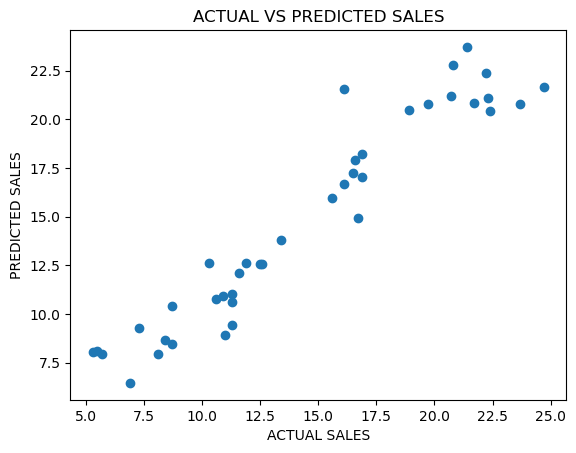

In [16]:
#scatter plot for actual vs predicted sales
plt.scatter(y_test, y_pred)
plt.xlabel('ACTUAL SALES')
plt.ylabel('PREDICTED SALES')
plt.title('ACTUAL VS PREDICTED SALES')
plt.show()


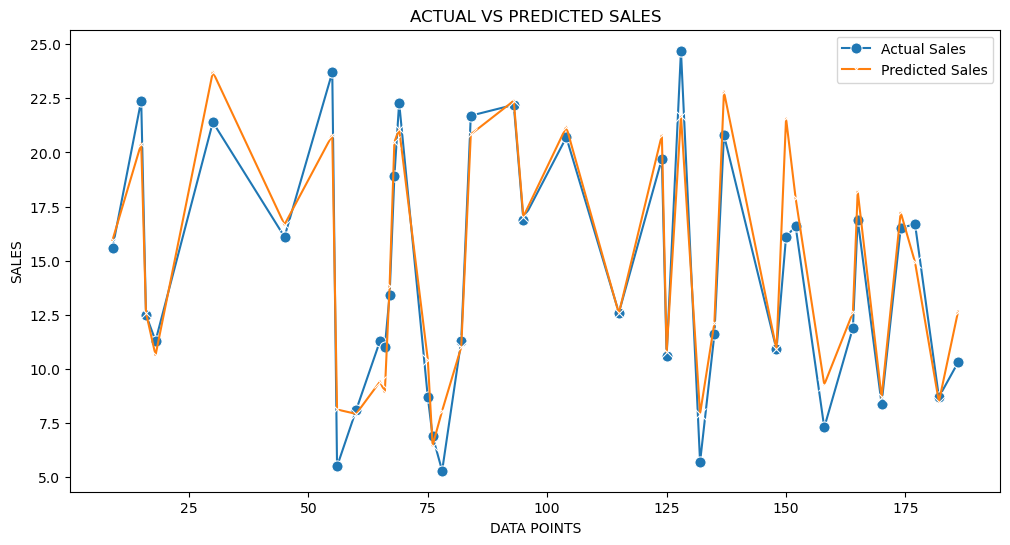

In [17]:
#Line plot for actual vs predicted sales
plt.figure(figsize=(12, 6))
sns.lineplot(x=X_test.index, y=y_test, label='Actual Sales', marker='o', markersize=8)
sns.lineplot(x=X_test.index, y=y_pred, label='Predicted Sales', marker='x', markersize=8)
plt.xlabel('DATA POINTS')
plt.ylabel('SALES')
plt.title('ACTUAL VS PREDICTED SALES')
plt.legend()
plt.show()

In [18]:
# Print the Coefficients
print('Coefficients:', model.coef_)

#Interpret the Coefficients
print('\nInterpretation of Coefficients:')
for feature, coefficient in zip(X.columns, model.coef_):
    print(f'{feature}: {coefficient}')

Coefficients: [0.05450927 0.00433665 0.10094536]

Interpretation of Coefficients:
TV: 0.05450927083721976
Newspaper: 0.004336646822034059
Radio: 0.10094536239295579


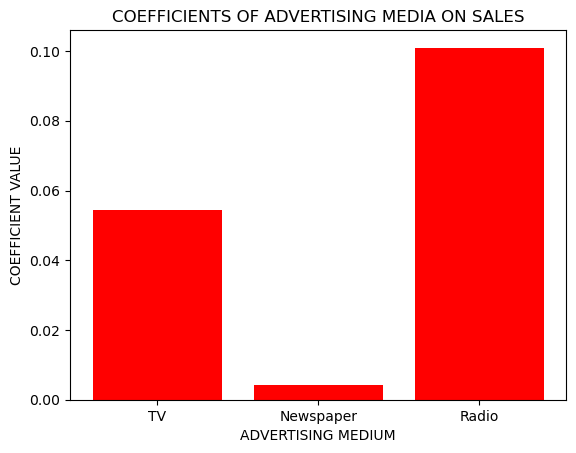

In [21]:
#Visualize Coefficients
coefficients = model.coef_
features = X.columns

plt.bar(features, coefficients,color='red')
plt.xlabel('ADVERTISING MEDIUM')
plt.ylabel('COEFFICIENT VALUE')
plt.title('COEFFICIENTS OF ADVERTISING MEDIA ON SALES')
plt.show()

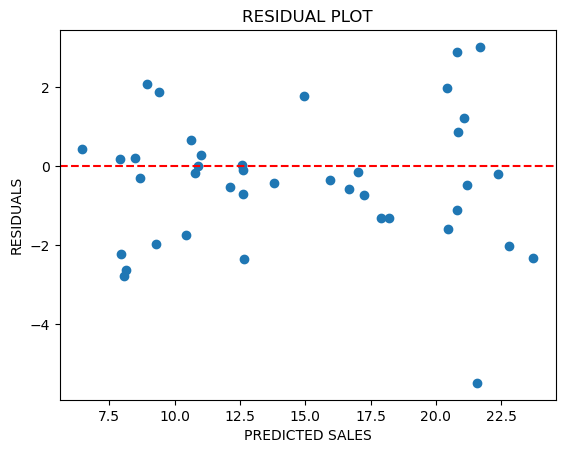

In [22]:
#Calculate residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('PREDICTED SALES')
plt.ylabel('RESIDUALS')
plt.title('RESIDUAL PLOT')
plt.show()